# Breast Cancer K-Means Segmmentation

Breast cancer is one of the most common and potentially fatal cancers among women worldwide. Early detection and accurate diagnosis are crucial in improving patient outcomes and survival rates. With the advent of medical technology and the accumulation of vast amounts of clinical data, machine learning techniques have emerged as powerful tools to aid in the early detection and diagnosis of breast cancer.

This dataset, sourced from the Wisconsin Diagnostic Breast Cancer (WDBC) dataset, contains features computed from digitized images of fine needle aspirate (FNA) of breast masses. These features describe the characteristics of the cell nuclei present in the images, such as radius, texture, perimeter, area, and smoothness, among others. The primary objective is to classify the breast cancer diagnosis as malignant (M) or benign (B) based on these features.

### Problem Statement

The goal of this project is to develop and evaluate machine learning models capable of accurately classifying breast cancer tumors as malignant or benign. This classification task will leverage the 30 features extracted from the FNA images, aiming to build a predictive model that can assist healthcare professionals in making more informed decisions.




## 1. Data Collection and Preprocessing

In [29]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [30]:
df = pd.read_csv("data.csv")

df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [31]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [32]:
df.shape

(569, 33)

In [33]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [34]:
# Checking for missing data
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [35]:
df.drop(['Unnamed: 32', 'id'], axis = 1, inplace =True)

In [36]:
# checking for duplicate values
df.duplicated().sum()

0

In [37]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encode the diagnosis column
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Verify the encoding
print(label_encoder.classes_)
print(df['diagnosis'].value_counts())  # Check the distribution

['B' 'M']
diagnosis
0    357
1    212
Name: count, dtype: int64


In [39]:
# Feature selection and encoding target variable
X = df.drop(columns=['diagnosis'])


In [40]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

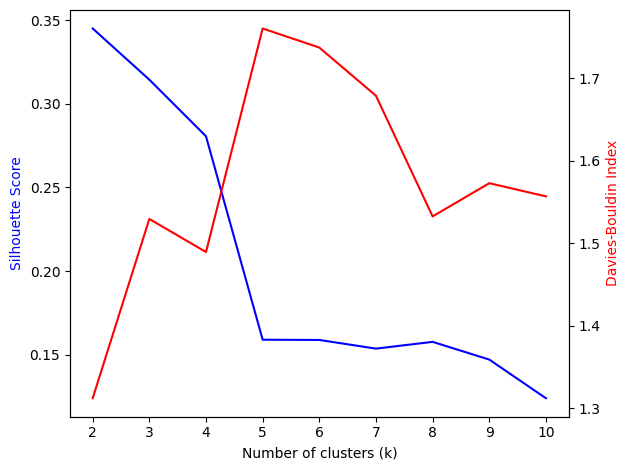

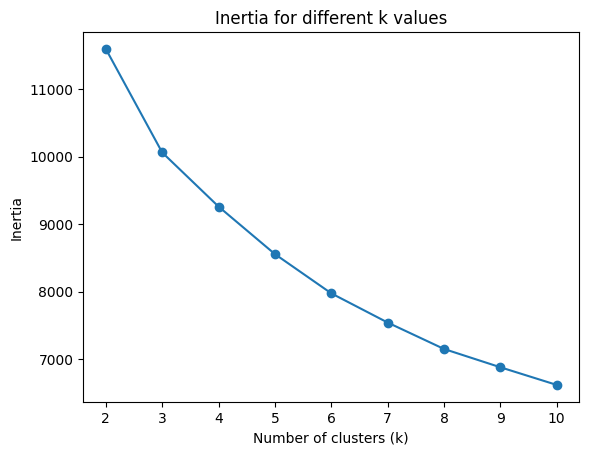

In [41]:
import matplotlib.pyplot as plt

# Experiment with different number of clusters
silhouette_scores = []
davies_bouldin_scores = []
inertia_values = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    clusters = kmeans.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, clusters)
    davies_bouldin_avg = davies_bouldin_score(X_scaled, clusters)
    inertia = kmeans.inertia_

    silhouette_scores.append(silhouette_avg)
    davies_bouldin_scores.append(davies_bouldin_avg)
    inertia_values.append(inertia)

# Plot the metrics
fig, ax1 = plt.subplots()

ax1.plot(k_values, silhouette_scores, 'b-')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Silhouette Score', color='b')

ax2 = ax1.twinx()
ax2.plot(k_values, davies_bouldin_scores, 'r-')
ax2.set_ylabel('Davies-Bouldin Index', color='r')

fig.tight_layout()
plt.show()

# Plot Inertia
plt.figure()
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia for different k values')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


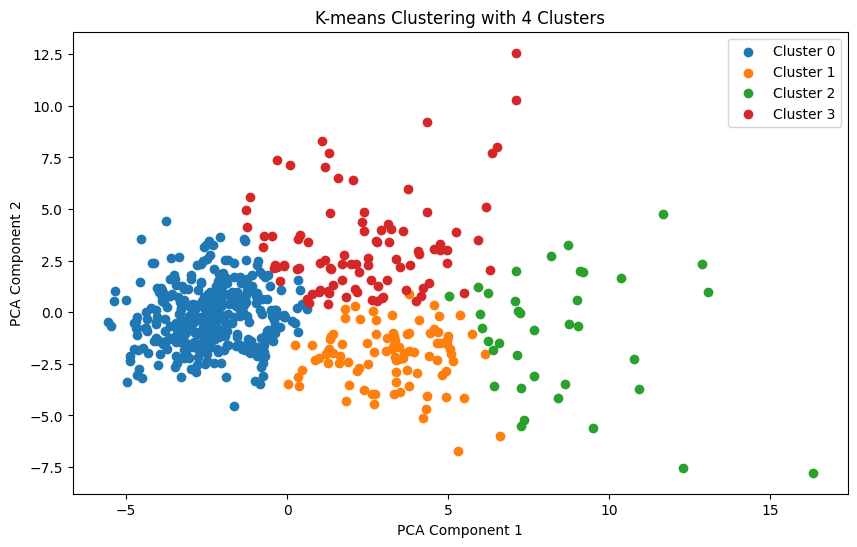

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit K-means with the optimal number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=1)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(X_pca[df['Cluster'] == cluster, 0], X_pca[df['Cluster'] == cluster, 1], label=f'Cluster {cluster}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering with 4 Clusters')
plt.legend()
plt.show()


In [43]:
# Calculate performance metrics
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
davies_bouldin_avg = davies_bouldin_score(X_scaled, df['Cluster'])
calinski_harabasz_avg = calinski_harabasz_score(X_scaled, df['Cluster'])

print(f'Silhouette Score: {silhouette_avg:.4f}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg:.4f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg:.4f}')

Silhouette Score: 0.2806
Davies-Bouldin Index: 1.4894
Calinski-Harabasz Index: 158.8235
